# K-Means Clustering & GMM(Gaussian Mixture Model)
## Alvaro Andres Esquivel Gomez 11002822


In [128]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import mixture
from datetime import datetime
from sklearn.mixture import GaussianMixture 

print(tf.__version__)

2.1.0


In [129]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [297]:
#Importando los datos
df = pd.read_csv('estaturas.csv', sep=';')
df.head()

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


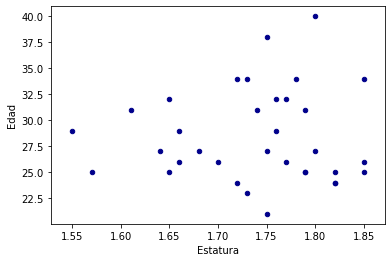

In [4]:
ax1 = df.plot.scatter(x='Estatura',
                      y='Edad',
                      c='DarkBlue')

In [16]:
def dist_euclidiana(x1, x2, y1, y2):
    return 0

## Función de K-Means Clustering

In [109]:
def k_means(datos, k):
    #Calculando los valores aleatorios de los centroides iniciales mediante dist. uniforme entre valore min y max
    centroides_x = np.random.default_rng().uniform(datos[:, 0].min(),datos[:, 0].max(), k)
    centroides_y = np.random.default_rng().uniform(datos[:, 1].min(),datos[:, 1].max(), k)
    centroides = np.concatenate((centroides_x.reshape(k,1), centroides_y.reshape(k,1)), axis=1)

    iteraciones = True
    while iteraciones:
        arr_labels = []
        costo = 0
        #Recorre cada uno de los puntos
        for i in datos:
            arr_dist = []
            #Calculo de las distancias de los puntos a los centroides
            for j in centroides:
                arr_int = np.array([i[0], i[1]])
                dist = np.linalg.norm(arr_int-j)
                arr_dist.append(dist)
            #Calculo de costo
            costo += arr_dist[np.argmin(arr_dist)]
            arr_labels.append(np.argmin(arr_dist))
        arr_labels = np.array(arr_labels)
        datos = np.concatenate((datos[:, :2], arr_labels.reshape(arr_labels.shape[0],1)), axis=1)
        #Promedio costo
        costo = costo / datos.shape[0]
       
        #Calculo de nuevos centroides
        temp_centroides = []
        for u in np.unique(datos[:, 2]):
            temp_by_label = datos[ datos[:, 2] == u]
            temp_x1 = temp_by_label[:, 0].mean()
            temp_x2 = temp_by_label[:, 1].mean()
            temp_centroides = np.concatenate((temp_centroides, [temp_x1, temp_x2]))
        
        temp_centroides = temp_centroides.reshape(int(temp_centroides.shape[0]/2),2)
        #Validacion de igualdad de los nuevos centroides calculados
        if (np.array_equal(centroides,temp_centroides)):
            iteraciones = False
        else:
            centroides = temp_centroides
            
    return datos, centroides, costo

## Función de multiples iteraciones de K-Means Clustering

In [110]:
def k_means_n_iteraciones(datos, k, n):
    record_datos = []
    record_centroides = []
    record_costos = []
    #Clasificacion en n iteraciones
    for i in range(1,n):
        datos_labels, centroides, costo = k_means(datos, k)
        record_datos.append(datos_labels)
        record_centroides.append(centroides)
        record_costos.append(costo)
    #Eleccion de error minimo
    pos_min = np.argmin(record_costos)
    best_error = record_costos[pos_min]
    best_classification = record_datos[pos_min]
    best_centroides = record_centroides[pos_min]
    print("Error minimo: ", best_error)
    print("Mejor ubicacion de centroides:\n", best_centroides)
    
    #Grafica de centroides
    plt.scatter(datos[:, 0],datos[:, 1])
    plt.scatter(best_centroides[:, 0],best_centroides[:, 1], c="red")
    plt.show()
    print("Mejor Clasificacion de Datos:")
    
    #Grafica de datos
    fig, ax = plt.subplots()
    scatter = ax.scatter(best_classification[:, 0], best_classification[:, 1], c = best_classification[:, 2])
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Clases")
    ax.add_artist(legend1)
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    plt.show()

    return best_classification, best_centroides, best_error

### Utilizando k = 2 y n = 10

Error minimo:  1.6966355538684201
Mejor ubicacion de centroides:
 [[ 1.728      32.66666667]
 [ 1.74526316 25.15789474]]


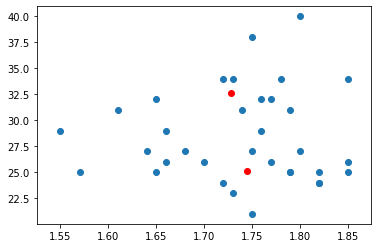

Mejor Clasificacion de Datos:


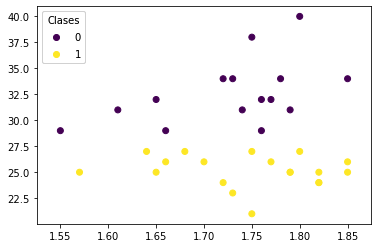

(array([[ 1.77, 26.  ,  1.  ],
        [ 1.74, 31.  ,  0.  ],
        [ 1.72, 24.  ,  1.  ],
        [ 1.78, 34.  ,  0.  ],
        [ 1.65, 32.  ,  0.  ],
        [ 1.66, 29.  ,  0.  ],
        [ 1.64, 27.  ,  1.  ],
        [ 1.85, 34.  ,  0.  ],
        [ 1.85, 26.  ,  1.  ],
        [ 1.75, 21.  ,  1.  ],
        [ 1.73, 23.  ,  1.  ],
        [ 1.79, 25.  ,  1.  ],
        [ 1.82, 24.  ,  1.  ],
        [ 1.65, 25.  ,  1.  ],
        [ 1.79, 25.  ,  1.  ],
        [ 1.72, 34.  ,  0.  ],
        [ 1.7 , 26.  ,  1.  ],
        [ 1.57, 25.  ,  1.  ],
        [ 1.66, 26.  ,  1.  ],
        [ 1.75, 27.  ,  1.  ],
        [ 1.77, 32.  ,  0.  ],
        [ 1.8 , 40.  ,  0.  ],
        [ 1.85, 25.  ,  1.  ],
        [ 1.82, 24.  ,  1.  ],
        [ 1.75, 38.  ,  0.  ],
        [ 1.73, 34.  ,  0.  ],
        [ 1.55, 29.  ,  0.  ],
        [ 1.76, 29.  ,  0.  ],
        [ 1.68, 27.  ,  1.  ],
        [ 1.76, 32.  ,  0.  ],
        [ 1.79, 31.  ,  0.  ],
        [ 1.61, 31.  ,  0.  ],
        

In [111]:
k_means_n_iteraciones(df.to_numpy(), 2, 10)

La clasificación que realizo el algoritmo fue de dos grupos por edades, con medias de 25 y 32 años.

### Utilizando k = 2 y n = 20

Error minimo:  1.6966355538684201
Mejor ubicacion de centroides:
 [[ 1.74526316 25.15789474]
 [ 1.728      32.66666667]]


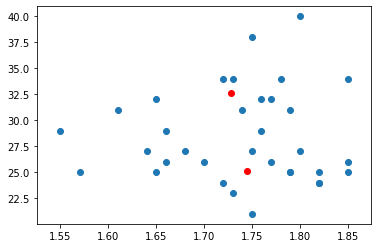

Mejor Clasificacion de Datos:


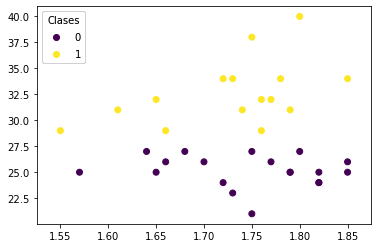

(array([[ 1.77, 26.  ,  0.  ],
        [ 1.74, 31.  ,  1.  ],
        [ 1.72, 24.  ,  0.  ],
        [ 1.78, 34.  ,  1.  ],
        [ 1.65, 32.  ,  1.  ],
        [ 1.66, 29.  ,  1.  ],
        [ 1.64, 27.  ,  0.  ],
        [ 1.85, 34.  ,  1.  ],
        [ 1.85, 26.  ,  0.  ],
        [ 1.75, 21.  ,  0.  ],
        [ 1.73, 23.  ,  0.  ],
        [ 1.79, 25.  ,  0.  ],
        [ 1.82, 24.  ,  0.  ],
        [ 1.65, 25.  ,  0.  ],
        [ 1.79, 25.  ,  0.  ],
        [ 1.72, 34.  ,  1.  ],
        [ 1.7 , 26.  ,  0.  ],
        [ 1.57, 25.  ,  0.  ],
        [ 1.66, 26.  ,  0.  ],
        [ 1.75, 27.  ,  0.  ],
        [ 1.77, 32.  ,  1.  ],
        [ 1.8 , 40.  ,  1.  ],
        [ 1.85, 25.  ,  0.  ],
        [ 1.82, 24.  ,  0.  ],
        [ 1.75, 38.  ,  1.  ],
        [ 1.73, 34.  ,  1.  ],
        [ 1.55, 29.  ,  1.  ],
        [ 1.76, 29.  ,  1.  ],
        [ 1.68, 27.  ,  0.  ],
        [ 1.76, 32.  ,  1.  ],
        [ 1.79, 31.  ,  1.  ],
        [ 1.61, 31.  ,  1.  ],
        

In [112]:
k_means_n_iteraciones(df.to_numpy(), 2, 20)

Esta vez la clasificación que realizo el algoritmo fue de dos grupos por edades, con medias de 25 y 32 años. Fueron las mismas clasificaciones que la vez anterior, debido a que se utilizo el mismo K, sin embargo se agregaron mas numero de iteraciones. 

### Utilizando k = 3 y n = 5

Error minimo:  1.294340149949638
Mejor ubicacion de centroides:
 [[ 1.72076923 31.69230769]
 [ 1.74526316 25.15789474]
 [ 1.775      39.        ]]


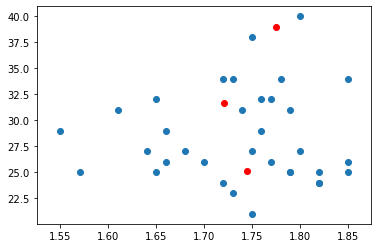

Mejor Clasificacion de Datos:


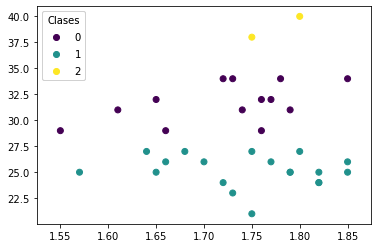

(array([[ 1.77, 26.  ,  1.  ],
        [ 1.74, 31.  ,  0.  ],
        [ 1.72, 24.  ,  1.  ],
        [ 1.78, 34.  ,  0.  ],
        [ 1.65, 32.  ,  0.  ],
        [ 1.66, 29.  ,  0.  ],
        [ 1.64, 27.  ,  1.  ],
        [ 1.85, 34.  ,  0.  ],
        [ 1.85, 26.  ,  1.  ],
        [ 1.75, 21.  ,  1.  ],
        [ 1.73, 23.  ,  1.  ],
        [ 1.79, 25.  ,  1.  ],
        [ 1.82, 24.  ,  1.  ],
        [ 1.65, 25.  ,  1.  ],
        [ 1.79, 25.  ,  1.  ],
        [ 1.72, 34.  ,  0.  ],
        [ 1.7 , 26.  ,  1.  ],
        [ 1.57, 25.  ,  1.  ],
        [ 1.66, 26.  ,  1.  ],
        [ 1.75, 27.  ,  1.  ],
        [ 1.77, 32.  ,  0.  ],
        [ 1.8 , 40.  ,  2.  ],
        [ 1.85, 25.  ,  1.  ],
        [ 1.82, 24.  ,  1.  ],
        [ 1.75, 38.  ,  2.  ],
        [ 1.73, 34.  ,  0.  ],
        [ 1.55, 29.  ,  0.  ],
        [ 1.76, 29.  ,  0.  ],
        [ 1.68, 27.  ,  1.  ],
        [ 1.76, 32.  ,  0.  ],
        [ 1.79, 31.  ,  0.  ],
        [ 1.61, 31.  ,  0.  ],
        

In [113]:
k_means_n_iteraciones(df.to_numpy(), 3, 5)

La clasificación del algoritmo de nuevo fue por edades, esta vez al tener unK de 3, fueron 3 grupos con edades medias de 25, 31 y 39 años. Es interesante notar que el ultimo grupo de 39 solo hay dos observaciones por lo que pudieron ser parte del mismo grupo. 

### Utilizando k = 4 y n = 20

Error minimo:  0.9964981198835922
Mejor ubicacion de centroides:
 [[ 1.74526316 25.15789474]
 [ 1.77       34.        ]
 [ 1.69888889 30.66666667]
 [ 1.775      39.        ]]


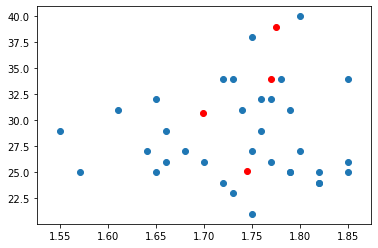

Mejor Clasificacion de Datos:


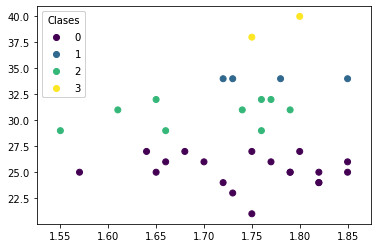

(array([[ 1.77, 26.  ,  0.  ],
        [ 1.74, 31.  ,  2.  ],
        [ 1.72, 24.  ,  0.  ],
        [ 1.78, 34.  ,  1.  ],
        [ 1.65, 32.  ,  2.  ],
        [ 1.66, 29.  ,  2.  ],
        [ 1.64, 27.  ,  0.  ],
        [ 1.85, 34.  ,  1.  ],
        [ 1.85, 26.  ,  0.  ],
        [ 1.75, 21.  ,  0.  ],
        [ 1.73, 23.  ,  0.  ],
        [ 1.79, 25.  ,  0.  ],
        [ 1.82, 24.  ,  0.  ],
        [ 1.65, 25.  ,  0.  ],
        [ 1.79, 25.  ,  0.  ],
        [ 1.72, 34.  ,  1.  ],
        [ 1.7 , 26.  ,  0.  ],
        [ 1.57, 25.  ,  0.  ],
        [ 1.66, 26.  ,  0.  ],
        [ 1.75, 27.  ,  0.  ],
        [ 1.77, 32.  ,  2.  ],
        [ 1.8 , 40.  ,  3.  ],
        [ 1.85, 25.  ,  0.  ],
        [ 1.82, 24.  ,  0.  ],
        [ 1.75, 38.  ,  3.  ],
        [ 1.73, 34.  ,  1.  ],
        [ 1.55, 29.  ,  2.  ],
        [ 1.76, 29.  ,  2.  ],
        [ 1.68, 27.  ,  0.  ],
        [ 1.76, 32.  ,  2.  ],
        [ 1.79, 31.  ,  2.  ],
        [ 1.61, 31.  ,  2.  ],
        

In [115]:
k_means_n_iteraciones(df.to_numpy(), 4, 20)

Utilizando K = 4, se obtuvo 4 rangos de edades, con medias de 25, 30, 34, 39. Es interesante notar que debido a la gran cantidad de datos con media de 30, fueron estos justamente que fueron separados en nuevas clases.

### Utilizando k = 6 y n = 30

Error minimo:  0.6396329616675276
Mejor ubicacion de centroides:
 [[ 1.775      39.        ]
 [ 1.75461538 25.07692308]
 [ 1.77       34.        ]
 [ 1.74       22.        ]
 [ 1.72       31.5       ]
 [ 1.69142857 27.85714286]]


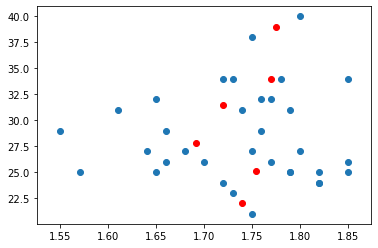

Mejor Clasificacion de Datos:


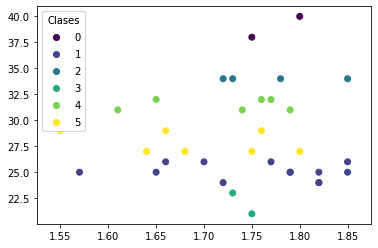

(array([[ 1.77, 26.  ,  1.  ],
        [ 1.74, 31.  ,  4.  ],
        [ 1.72, 24.  ,  1.  ],
        [ 1.78, 34.  ,  2.  ],
        [ 1.65, 32.  ,  4.  ],
        [ 1.66, 29.  ,  5.  ],
        [ 1.64, 27.  ,  5.  ],
        [ 1.85, 34.  ,  2.  ],
        [ 1.85, 26.  ,  1.  ],
        [ 1.75, 21.  ,  3.  ],
        [ 1.73, 23.  ,  3.  ],
        [ 1.79, 25.  ,  1.  ],
        [ 1.82, 24.  ,  1.  ],
        [ 1.65, 25.  ,  1.  ],
        [ 1.79, 25.  ,  1.  ],
        [ 1.72, 34.  ,  2.  ],
        [ 1.7 , 26.  ,  1.  ],
        [ 1.57, 25.  ,  1.  ],
        [ 1.66, 26.  ,  1.  ],
        [ 1.75, 27.  ,  5.  ],
        [ 1.77, 32.  ,  4.  ],
        [ 1.8 , 40.  ,  0.  ],
        [ 1.85, 25.  ,  1.  ],
        [ 1.82, 24.  ,  1.  ],
        [ 1.75, 38.  ,  0.  ],
        [ 1.73, 34.  ,  2.  ],
        [ 1.55, 29.  ,  5.  ],
        [ 1.76, 29.  ,  5.  ],
        [ 1.68, 27.  ,  5.  ],
        [ 1.76, 32.  ,  4.  ],
        [ 1.79, 31.  ,  4.  ],
        [ 1.61, 31.  ,  4.  ],
        

In [184]:
k_means_n_iteraciones(df.to_numpy(), 6, 30)

Cuando elevamos el valor de K hasta 6, vemos una nueva clasificación con edades medias de 22, 27, 31, 24 y 39, estos grupos son muy pequeños y tenemos dos grupos con solo 2 integrantes, los que tienen 22 y 39 años de media.

### Utilizando k = 8 y n = 30

Error minimo:  0.3727708384893457
Mejor ubicacion de centroides:
 [[ 1.65666667 29.        ]
 [ 1.78666667 24.        ]
 [ 1.745      25.4       ]
 [ 1.72       31.5       ]
 [ 1.74       22.        ]
 [ 1.7175     27.        ]
 [ 1.775      39.        ]
 [ 1.77       34.        ]]


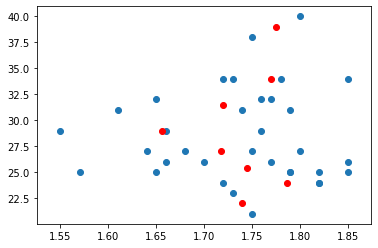

Mejor Clasificacion de Datos:


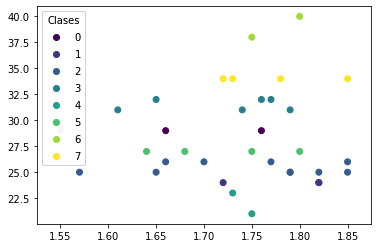

(array([[ 1.77, 26.  ,  2.  ],
        [ 1.74, 31.  ,  3.  ],
        [ 1.72, 24.  ,  1.  ],
        [ 1.78, 34.  ,  7.  ],
        [ 1.65, 32.  ,  3.  ],
        [ 1.66, 29.  ,  0.  ],
        [ 1.64, 27.  ,  5.  ],
        [ 1.85, 34.  ,  7.  ],
        [ 1.85, 26.  ,  2.  ],
        [ 1.75, 21.  ,  4.  ],
        [ 1.73, 23.  ,  4.  ],
        [ 1.79, 25.  ,  2.  ],
        [ 1.82, 24.  ,  1.  ],
        [ 1.65, 25.  ,  2.  ],
        [ 1.79, 25.  ,  2.  ],
        [ 1.72, 34.  ,  7.  ],
        [ 1.7 , 26.  ,  2.  ],
        [ 1.57, 25.  ,  2.  ],
        [ 1.66, 26.  ,  2.  ],
        [ 1.75, 27.  ,  5.  ],
        [ 1.77, 32.  ,  3.  ],
        [ 1.8 , 40.  ,  6.  ],
        [ 1.85, 25.  ,  2.  ],
        [ 1.82, 24.  ,  1.  ],
        [ 1.75, 38.  ,  6.  ],
        [ 1.73, 34.  ,  7.  ],
        [ 1.55, 29.  ,  0.  ],
        [ 1.76, 29.  ,  0.  ],
        [ 1.68, 27.  ,  5.  ],
        [ 1.76, 32.  ,  3.  ],
        [ 1.79, 31.  ,  3.  ],
        [ 1.61, 31.  ,  3.  ],
        

In [116]:
k_means_n_iteraciones(df.to_numpy(), 8, 30)

Haciendo más grande el numero de K, vemos que únicamente hacemos mas grupos con muy pocos integrantes, ahora ya hay 3 grupos con unicamente 2 observaciones. Las medias de los grupos son: 22, 24, 25, 27, 29, 31, 34 y 39.

## Validación de método del codo (Elbow Method)

Numero de clases: 1 

Error minimo:  3.704342959976456
Mejor ubicacion de centroides:
 [[ 1.73764706 28.47058824]]


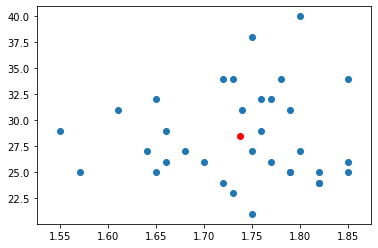

Mejor Clasificacion de Datos:


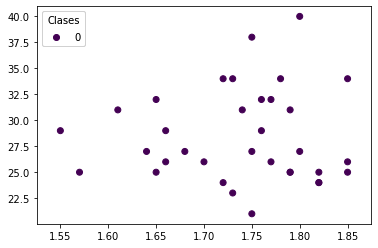

Numero de clases: 2 

Error minimo:  1.6966355538684201
Mejor ubicacion de centroides:
 [[ 1.728      32.66666667]
 [ 1.74526316 25.15789474]]


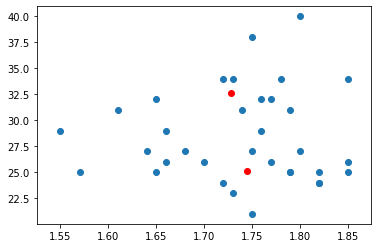

Mejor Clasificacion de Datos:


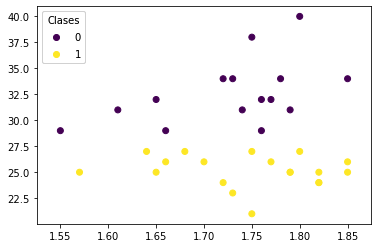

Numero de clases: 3 

Error minimo:  1.294340149949638
Mejor ubicacion de centroides:
 [[ 1.72076923 31.69230769]
 [ 1.775      39.        ]
 [ 1.74526316 25.15789474]]


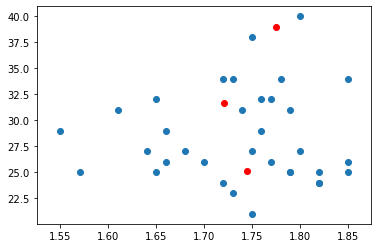

Mejor Clasificacion de Datos:


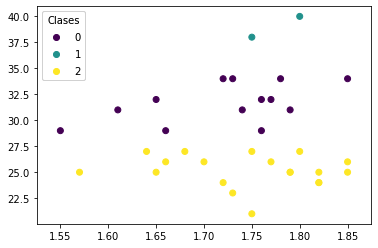

Numero de clases: 4 

Error minimo:  0.9964981198835922
Mejor ubicacion de centroides:
 [[ 1.775      39.        ]
 [ 1.69888889 30.66666667]
 [ 1.77       34.        ]
 [ 1.74526316 25.15789474]]


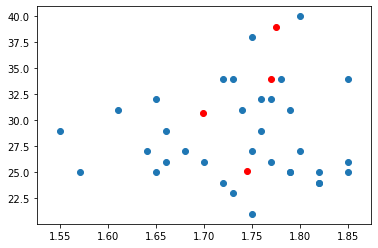

Mejor Clasificacion de Datos:


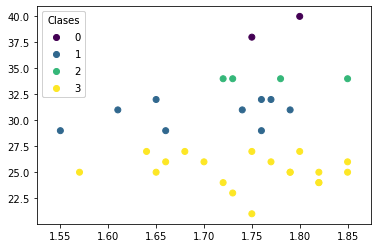

Numero de clases: 5 

Error minimo:  0.7663829225149132
Mejor ubicacion de centroides:
 [[ 1.77       34.        ]
 [ 1.72       31.5       ]
 [ 1.75545455 24.18181818]
 [ 1.775      39.        ]
 [ 1.71090909 27.18181818]]


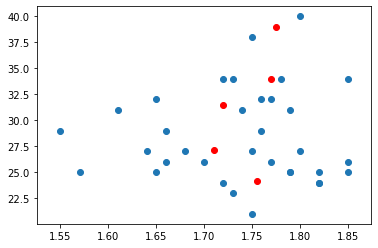

Mejor Clasificacion de Datos:


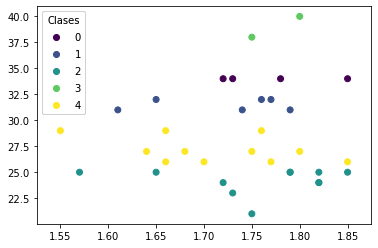

Numero de clases: 6 

Error minimo:  0.60659054272694
Mejor ubicacion de centroides:
 [[ 1.65666667 29.        ]
 [ 1.77       34.        ]
 [ 1.768      23.2       ]
 [ 1.72       31.5       ]
 [ 1.73714286 25.85714286]
 [ 1.775      39.        ]]


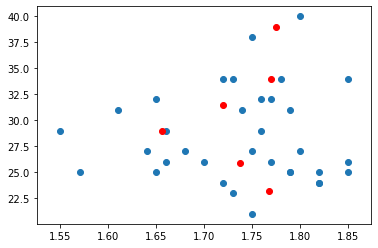

Mejor Clasificacion de Datos:


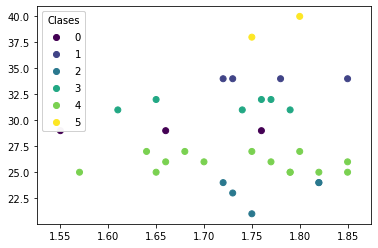

Numero de clases: 7 

Error minimo:  0.5687827422711847
Mejor ubicacion de centroides:
 [[ 1.65666667 29.        ]
 [ 1.775      39.        ]
 [ 1.77       34.        ]
 [ 1.75545455 24.18181818]
 [ 1.73125    26.5       ]
 [ 1.72       31.5       ]]


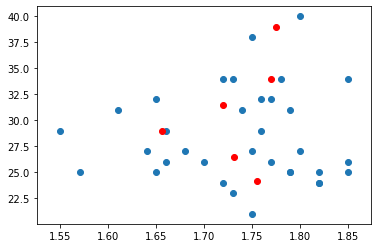

Mejor Clasificacion de Datos:


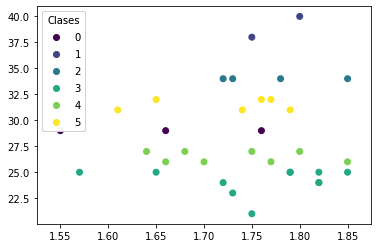

Numero de clases: 8 

Error minimo:  0.4315231703278463
Mejor ubicacion de centroides:
 [[ 1.75       38.        ]
 [ 1.75545455 24.18181818]
 [ 1.77       34.        ]
 [ 1.72666667 32.        ]
 [ 1.73125    26.5       ]
 [ 1.65666667 29.        ]
 [ 1.71333333 31.        ]
 [ 1.8        40.        ]]


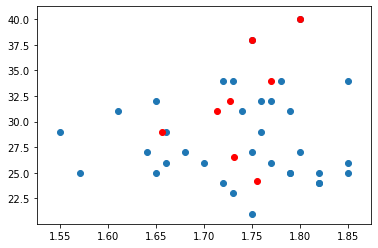

Mejor Clasificacion de Datos:


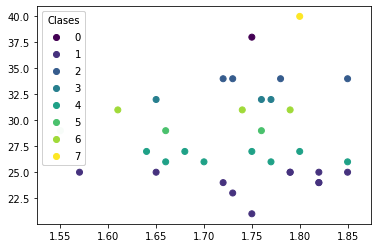

Numero de clases: 9 

Error minimo:  0.3926063837990454
Mejor ubicacion de centroides:
 [[ 1.7175     27.        ]
 [ 1.75       38.        ]
 [ 1.745      25.4       ]
 [ 1.72       31.5       ]
 [ 1.65666667 29.        ]
 [ 1.77       34.        ]
 [ 1.8        40.        ]
 [ 1.768      23.2       ]]


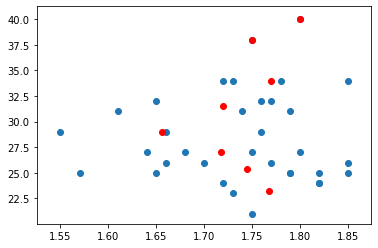

Mejor Clasificacion de Datos:


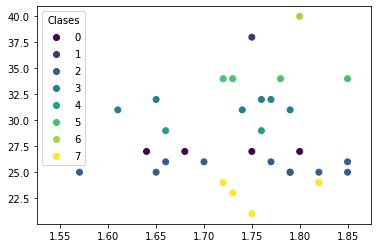

Numero de clases: 10 

Error minimo:  0.35705273653100256
Mejor ubicacion de centroides:
 [[ 1.745      25.        ]
 [ 1.72666667 32.        ]
 [ 1.768      23.2       ]
 [ 1.775      39.        ]
 [ 1.73125    26.5       ]
 [ 1.77       34.        ]
 [ 1.65666667 29.        ]
 [ 1.71333333 31.        ]]


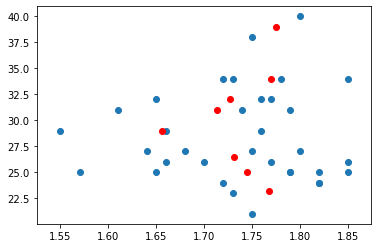

Mejor Clasificacion de Datos:


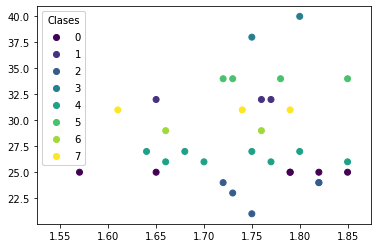

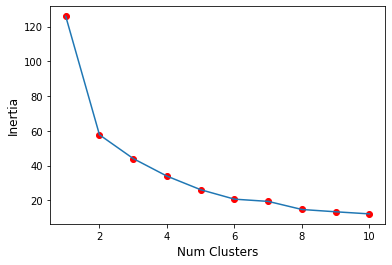

In [218]:
inercias = []
n_labels = []
for i in range(1, 11):
    print("Numero de clases:", i, "\n")
    _, _, error = k_means_n_iteraciones(df.to_numpy(), i, 10)
    inercia = error * df.shape[0]
    inercias.append(inercia)
    n_labels.append(i)

plt.scatter(n_labels, inercias, c = "red")
plt.plot(n_labels, inercias)
plt.xlabel('Num Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.show()


Analizando la grafica del método del codo, es evidente que si puede ser de utilidad, ya que nos brinda una posible visualización sobre la cantidad de clases que deberíamos tener, en la imagen anterior muestra que mientras mas clases hay una disminución en la distancia promedio de los puntos con los centroides, el numero de clases podria ser 2 o 6, debido a que son los cambios mas significativos en la tendencia de la grafica. 

## Soft-clustering con GMM usando sklearn

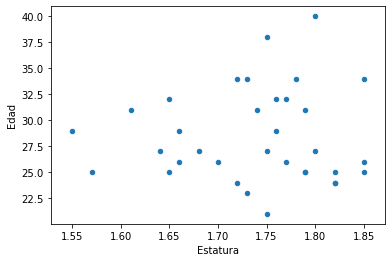

In [293]:
estaturas = df
estaturas.plot.scatter(x='Estatura',
                      y='Edad')

In [178]:
def gmm(datos, k):

    gmm = GaussianMixture(n_components = k) 

    gmm.fit(datos) 

    labels = gmm.predict(datos) 
    datos['labels']= labels 


    datos = datos.to_numpy()

    #Grafica de datos
    fig, ax = plt.subplots()
    scatter = ax.scatter(datos[:, 0], datos[:, 1], c = datos[:, 2])
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Clases")
    ax.add_artist(legend1)
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    plt.show()
    
    return datos

In [253]:
def clas_modelo(clases):
    for u in np.unique(clases[:, 2]):
        #Valores del Cluster
        temp_by_label = clases[ clases[:, 2] == u]
        centroide_x = temp_by_label[: , 0].mean()
        centroide_y = temp_by_label[: , 1].mean()
        print(centroide_x, centroide_y)

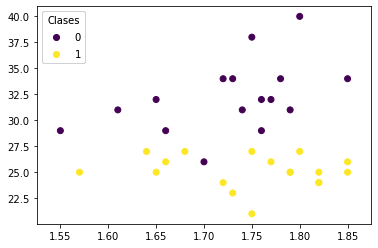

[[ 1.77 26.    1.  ]
 [ 1.74 31.    0.  ]
 [ 1.72 24.    1.  ]
 [ 1.78 34.    0.  ]
 [ 1.65 32.    0.  ]
 [ 1.66 29.    0.  ]
 [ 1.64 27.    1.  ]
 [ 1.85 34.    0.  ]
 [ 1.85 26.    1.  ]
 [ 1.75 21.    1.  ]
 [ 1.73 23.    1.  ]
 [ 1.79 25.    1.  ]
 [ 1.82 24.    1.  ]
 [ 1.65 25.    1.  ]
 [ 1.79 25.    1.  ]
 [ 1.72 34.    0.  ]
 [ 1.7  26.    0.  ]
 [ 1.57 25.    1.  ]
 [ 1.66 26.    1.  ]
 [ 1.75 27.    1.  ]
 [ 1.77 32.    0.  ]
 [ 1.8  40.    0.  ]
 [ 1.85 25.    1.  ]
 [ 1.82 24.    1.  ]
 [ 1.75 38.    0.  ]
 [ 1.73 34.    0.  ]
 [ 1.55 29.    0.  ]
 [ 1.76 29.    0.  ]
 [ 1.68 27.    1.  ]
 [ 1.76 32.    0.  ]
 [ 1.79 31.    0.  ]
 [ 1.61 31.    0.  ]
 [ 1.82 25.    1.  ]
 [ 1.8  27.    1.  ]]
1.72625 32.25
1.7477777777777779 25.11111111111111


In [254]:
clases = gmm(estaturas, 2)
print(clases)
clas_modelo(clases)

Con dos observacines el modelo de GMM es muy similar al desarrollado mediante K-Means, por lo que hace la diferencia entre clases mediante la edad, en este caso en grupos con medias de 25 y 35 años.

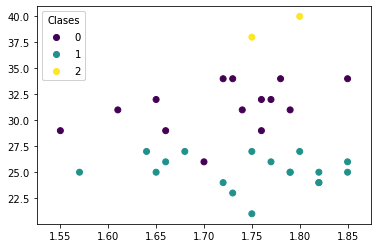

[[ 1.77 26.    1.  ]
 [ 1.74 31.    0.  ]
 [ 1.72 24.    1.  ]
 [ 1.78 34.    0.  ]
 [ 1.65 32.    0.  ]
 [ 1.66 29.    0.  ]
 [ 1.64 27.    1.  ]
 [ 1.85 34.    0.  ]
 [ 1.85 26.    1.  ]
 [ 1.75 21.    1.  ]
 [ 1.73 23.    1.  ]
 [ 1.79 25.    1.  ]
 [ 1.82 24.    1.  ]
 [ 1.65 25.    1.  ]
 [ 1.79 25.    1.  ]
 [ 1.72 34.    0.  ]
 [ 1.7  26.    0.  ]
 [ 1.57 25.    1.  ]
 [ 1.66 26.    1.  ]
 [ 1.75 27.    1.  ]
 [ 1.77 32.    0.  ]
 [ 1.8  40.    2.  ]
 [ 1.85 25.    1.  ]
 [ 1.82 24.    1.  ]
 [ 1.75 38.    2.  ]
 [ 1.73 34.    0.  ]
 [ 1.55 29.    0.  ]
 [ 1.76 29.    0.  ]
 [ 1.68 27.    1.  ]
 [ 1.76 32.    0.  ]
 [ 1.79 31.    0.  ]
 [ 1.61 31.    0.  ]
 [ 1.82 25.    1.  ]
 [ 1.8  27.    1.  ]]
1.7192857142857145 31.285714285714285
1.7477777777777779 25.11111111111111
1.775 39.0


In [257]:
clases = gmm(estaturas, 3)
print(clases)
clas_modelo(clases)

Al igual que el modelo de k-means, cuando agregamos un grupo mas, encontramos observaciones de muy pocos elementos, en este caso es un nuevo tipo con media de 39, adicional a las de 25 y 31.

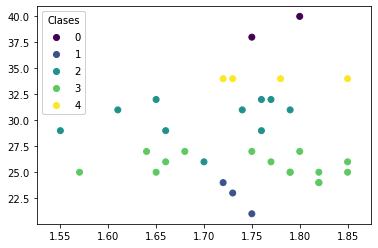

[[ 1.77 26.    3.  ]
 [ 1.74 31.    2.  ]
 [ 1.72 24.    1.  ]
 [ 1.78 34.    4.  ]
 [ 1.65 32.    2.  ]
 [ 1.66 29.    2.  ]
 [ 1.64 27.    3.  ]
 [ 1.85 34.    4.  ]
 [ 1.85 26.    3.  ]
 [ 1.75 21.    1.  ]
 [ 1.73 23.    1.  ]
 [ 1.79 25.    3.  ]
 [ 1.82 24.    3.  ]
 [ 1.65 25.    3.  ]
 [ 1.79 25.    3.  ]
 [ 1.72 34.    4.  ]
 [ 1.7  26.    2.  ]
 [ 1.57 25.    3.  ]
 [ 1.66 26.    3.  ]
 [ 1.75 27.    3.  ]
 [ 1.77 32.    2.  ]
 [ 1.8  40.    0.  ]
 [ 1.85 25.    3.  ]
 [ 1.82 24.    3.  ]
 [ 1.75 38.    0.  ]
 [ 1.73 34.    4.  ]
 [ 1.55 29.    2.  ]
 [ 1.76 29.    2.  ]
 [ 1.68 27.    3.  ]
 [ 1.76 32.    2.  ]
 [ 1.79 31.    2.  ]
 [ 1.61 31.    2.  ]
 [ 1.82 25.    3.  ]
 [ 1.8  27.    3.  ]]
1.775 39.0
1.7333333333333332 22.666666666666668
1.6989999999999998 30.2
1.7506666666666668 25.6
1.77 34.0


In [261]:
clases = gmm(estaturas, 5)
print(clases)
clas_modelo(clases)

De nuevo un comportamiento muy similar, ahora se creo un nuevo grupo con media de 22 con unicamente 3 observaciones, adicionales a las de 25, 30 y 34.

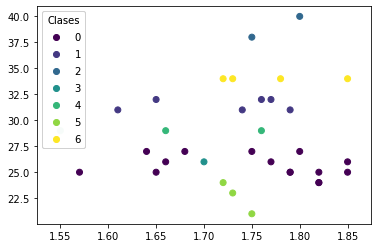

[[ 1.77 26.    0.  ]
 [ 1.74 31.    1.  ]
 [ 1.72 24.    5.  ]
 [ 1.78 34.    6.  ]
 [ 1.65 32.    1.  ]
 [ 1.66 29.    4.  ]
 [ 1.64 27.    0.  ]
 [ 1.85 34.    6.  ]
 [ 1.85 26.    0.  ]
 [ 1.75 21.    5.  ]
 [ 1.73 23.    5.  ]
 [ 1.79 25.    0.  ]
 [ 1.82 24.    0.  ]
 [ 1.65 25.    0.  ]
 [ 1.79 25.    0.  ]
 [ 1.72 34.    6.  ]
 [ 1.7  26.    3.  ]
 [ 1.57 25.    0.  ]
 [ 1.66 26.    0.  ]
 [ 1.75 27.    0.  ]
 [ 1.77 32.    1.  ]
 [ 1.8  40.    2.  ]
 [ 1.85 25.    0.  ]
 [ 1.82 24.    0.  ]
 [ 1.75 38.    2.  ]
 [ 1.73 34.    6.  ]
 [ 1.55 29.    4.  ]
 [ 1.76 29.    4.  ]
 [ 1.68 27.    0.  ]
 [ 1.76 32.    1.  ]
 [ 1.79 31.    1.  ]
 [ 1.61 31.    1.  ]
 [ 1.82 25.    0.  ]
 [ 1.8  27.    0.  ]]
1.7506666666666668 25.6
1.72 31.5
1.775 39.0
1.7 26.0
1.6566666666666665 29.0
1.7333333333333332 22.666666666666668
1.77 34.0


In [264]:
clases = gmm(estaturas, 7)
print(clases)
clas_modelo(clases)

Agregando mas grupos, vemos que su comportamiento empieza a tener demasiados grupos con muy pocas observaciones, por lo que ya se visualiza que es innecesario. 

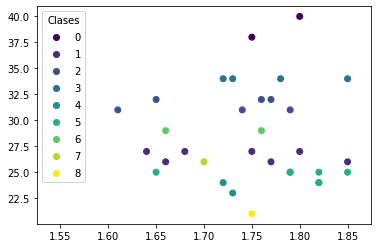

[[ 1.77 26.    1.  ]
 [ 1.74 31.    2.  ]
 [ 1.72 24.    4.  ]
 [ 1.78 34.    3.  ]
 [ 1.65 32.    2.  ]
 [ 1.66 29.    6.  ]
 [ 1.64 27.    1.  ]
 [ 1.85 34.    3.  ]
 [ 1.85 26.    1.  ]
 [ 1.75 21.    8.  ]
 [ 1.73 23.    4.  ]
 [ 1.79 25.    5.  ]
 [ 1.82 24.    5.  ]
 [ 1.65 25.    5.  ]
 [ 1.79 25.    5.  ]
 [ 1.72 34.    3.  ]
 [ 1.7  26.    7.  ]
 [ 1.57 25.    5.  ]
 [ 1.66 26.    1.  ]
 [ 1.75 27.    1.  ]
 [ 1.77 32.    2.  ]
 [ 1.8  40.    0.  ]
 [ 1.85 25.    5.  ]
 [ 1.82 24.    5.  ]
 [ 1.75 38.    0.  ]
 [ 1.73 34.    3.  ]
 [ 1.55 29.    6.  ]
 [ 1.76 29.    6.  ]
 [ 1.68 27.    1.  ]
 [ 1.76 32.    2.  ]
 [ 1.79 31.    2.  ]
 [ 1.61 31.    2.  ]
 [ 1.82 25.    5.  ]
 [ 1.8  27.    1.  ]]
1.775 39.0
1.7357142857142858 26.571428571428573
1.72 31.5
1.77 34.0
1.725 23.5
1.7637500000000002 24.75
1.6566666666666665 29.0
1.7 26.0
1.75 21.0


In [265]:
clases = gmm(estaturas, 9)
print(clases)
clas_modelo(clases)

Un modelo de 9 tipos de datos ya encontramos separaciones con medias similares de edad, pero un cambio en estatura, como por ejemplo: media de 23 y 24 años, y separacion por estatura de 1.72 y 1.76, que es muy baja relativamente. 

## Método del codo (Elbow Method) para GMM

Numero de clases: 1 



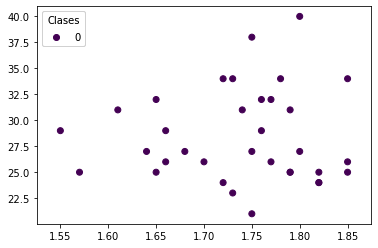

Numero de clases: 2 



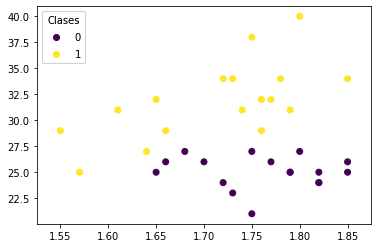

Numero de clases: 3 



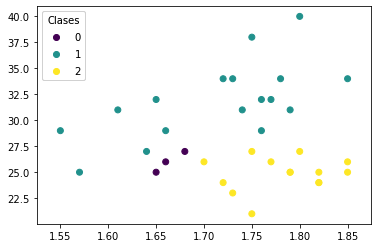

Numero de clases: 4 



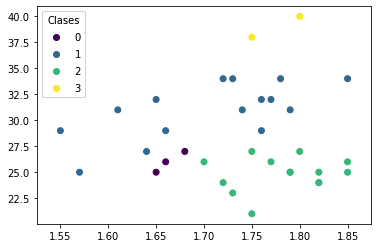

Numero de clases: 5 



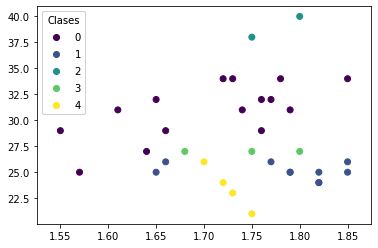

Numero de clases: 6 



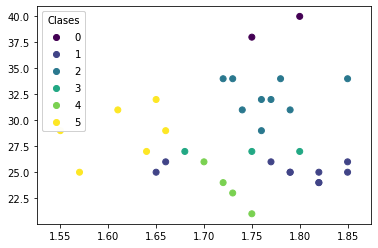

Numero de clases: 7 



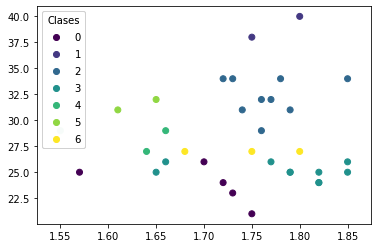

Numero de clases: 8 



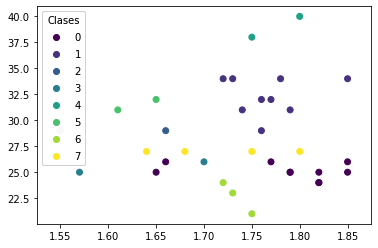

Numero de clases: 9 



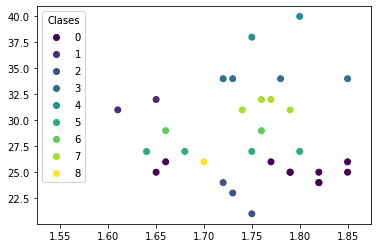

Numero de clases: 10 



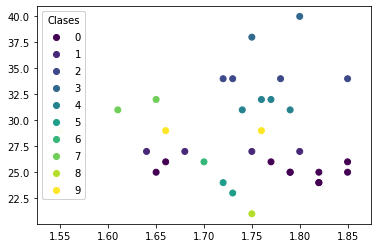

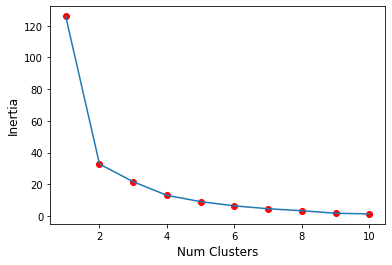

In [249]:
inercias = []
n_labels = []
for i in range(1, 11):
    print("Numero de clases:", i, "\n")
    clases = gmm(estaturas, i)
    ine = 0
    #Cada label
    for u in np.unique(clases[:, 2]):
        #Valores del Cluster
        temp_by_label = clases[ clases[:, 2] == u]
        centroide_x = temp_by_label[: , 0].mean()
        centroide_y = temp_by_label[: , 1].mean()
        for j in temp_by_label:
            dist = np.linalg.norm(np.array([j[0], j[1]]) - np.array([centroide_x, centroide_y]))
            ine += dist
            
    inercias.append(ine / int(np.unique(clases[:, 2]).shape[0]))
    n_labels.append(i)

#Grafico
plt.scatter(n_labels, inercias, c = "red")
plt.plot(n_labels, inercias)
plt.xlabel('Num Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.show()

Los valores son muy similares a los encontrados con el metodo de K-Means anterior, y de igual manera, el mejor valor para el numero de clusters es 2. Al ser una grafica realmente útil podemos concluir que es necesaria para idetificar el modelo mas adecuado. 

## Función de predicción para K-Means

Error minimo:  0.9964981198835922
Mejor ubicacion de centroides:
 [[ 1.69888889 30.66666667]
 [ 1.775      39.        ]
 [ 1.74526316 25.15789474]
 [ 1.77       34.        ]]


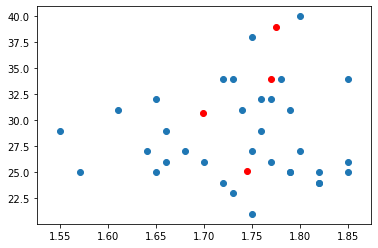

Mejor Clasificacion de Datos:


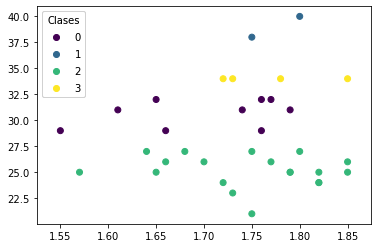

In [268]:
#Usando la prediccion
_, centroides, _ = k_means_n_iteraciones(df.to_numpy(), 4, 10)

In [270]:
#Importando los datos
anomalias = pd.read_csv('estaturas_anomalias.csv', sep=';')
anomalias

,Estatura,Edad
0,0.25,2.4
1,175.10,2.5
2,0.15,250.0
3,150.00,14.0


In [285]:
def k_means_predict(valores, centroides):
    predicciones = []
    for i in valores:
        print("La observación: ", i)
        distancias = []
        for j in centroides:
            dist = np.linalg.norm(i - j)
            distancias.append(dist)
        print("Pertenece al Cluster: ", np.argmin(distancias))
        predicciones.append(np.argmin(distancias))
    return predicciones

k_means_predict(anomalias.to_numpy(), centroides)

La observación:  [0.25 2.4 ]
Pertenece al Cluster:  2
La observación:  [175.1   2.5]
Pertenece al Cluster:  2
La observación:  [1.5e-01 2.5e+02]
Pertenece al Cluster:  1
La observación:  [150.  14.]
Pertenece al Cluster:  2


[2, 2, 1, 2]

## Probabilidad de pertenecer a cada cluster según GMM

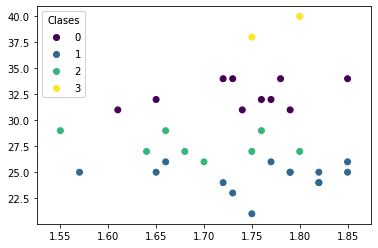

Modelo datos con Clusters mediante GMM
 [[ 1.77 26.    1.  ]
 [ 1.74 31.    0.  ]
 [ 1.72 24.    1.  ]
 [ 1.78 34.    0.  ]
 [ 1.65 32.    0.  ]
 [ 1.66 29.    2.  ]
 [ 1.64 27.    2.  ]
 [ 1.85 34.    0.  ]
 [ 1.85 26.    1.  ]
 [ 1.75 21.    1.  ]
 [ 1.73 23.    1.  ]
 [ 1.79 25.    1.  ]
 [ 1.82 24.    1.  ]
 [ 1.65 25.    1.  ]
 [ 1.79 25.    1.  ]
 [ 1.72 34.    0.  ]
 [ 1.7  26.    2.  ]
 [ 1.57 25.    1.  ]
 [ 1.66 26.    1.  ]
 [ 1.75 27.    2.  ]
 [ 1.77 32.    0.  ]
 [ 1.8  40.    3.  ]
 [ 1.85 25.    1.  ]
 [ 1.82 24.    1.  ]
 [ 1.75 38.    3.  ]
 [ 1.73 34.    0.  ]
 [ 1.55 29.    2.  ]
 [ 1.76 29.    2.  ]
 [ 1.68 27.    2.  ]
 [ 1.76 32.    0.  ]
 [ 1.79 31.    0.  ]
 [ 1.61 31.    0.  ]
 [ 1.82 25.    1.  ]
 [ 1.8  27.    2.  ]]
Probabilidad de pertenecer a cada cluster:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [315]:
estaturas = df

#Realizando el modelo GMM
gmm = GaussianMixture(n_components = 4) 
gmm.fit(estaturas) 
labels = gmm.predict(estaturas) 
estaturas['labels']= labels 

estaturas = estaturas.to_numpy()

#Grafica de datos
fig, ax = plt.subplots()
scatter = ax.scatter(estaturas[:, 0], estaturas[:, 1], c = estaturas[:, 2])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clases")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.show()

print("Modelo datos con Clusters mediante GMM\n", estaturas)

#Probabilidad de pertenecer a cada cluster
anom_pred = gmm.predict_proba(anomalias) 
print("Probabilidad de pertenecer a cada cluster:\n", anom_pred)
